In this notebook, we will train a CNN to classify images from the CIFAR-10 dataset

1. Load CIFAR-10 dataset

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


2. Visualize the first 24 training images

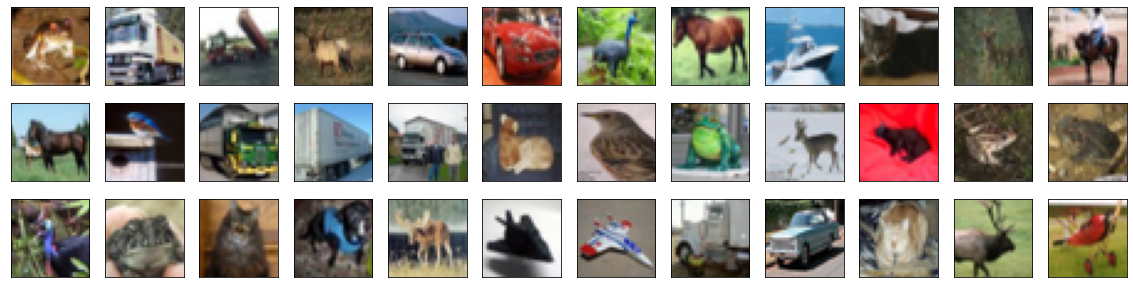

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

3. Rescale the images by dividing every pixel in every image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

4. Break dataset into training, testing, and validation sets.

In [6]:
from keras.utils import np_utils
from keras import utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


5. Define the Model Architecture

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

6. Compile the model

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

7. Train the model

In [9]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.49990, saving model to model.weights.best.hdf5
1407/1407 - 21s - loss: 1.5964 - accuracy: 0.4192 - val_loss: 1.4999 - val_accuracy: 0.4560 - 21s/epoch - 15ms/step
Epoch 2/100

Epoch 2: val_loss improved from 1.49990 to 1.20823, saving model to model.weights.best.hdf5
1407/1407 - 10s - loss: 1.2830 - accuracy: 0.5396 - val_loss: 1.2082 - val_accuracy: 0.5930 - 10s/epoch - 7ms/step
Epoch 3/100

Epoch 3: val_loss improved from 1.20823 to 1.19902, saving model to model.weights.best.hdf5
1407/1407 - 11s - loss: 1.1627 - accuracy: 0.5865 - val_loss: 1.1990 - val_accuracy: 0.5970 - 11s/epoch - 8ms/step
Epoch 4/100

Epoch 4: val_loss improved from 1.19902 to 1.05326, saving model to model.weights.best.hdf5
1407/1407 - 11s - loss: 1.0936 - accuracy: 0.6159 - val_loss: 1.0533 - val_accuracy: 0.6344 - 11s/epoch - 8ms/step
Epoch 5/100

Epoch 5: val_loss improved from 1.05326 to 0.99740, saving model to model.weights.best.hdf5
1407/1407 - 10s - 

8. Load the model with the best validation accuracy

In [10]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

9. Calculate classification accuracy on test set

In [11]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6800000071525574


10. Visualize some predictions

In [12]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

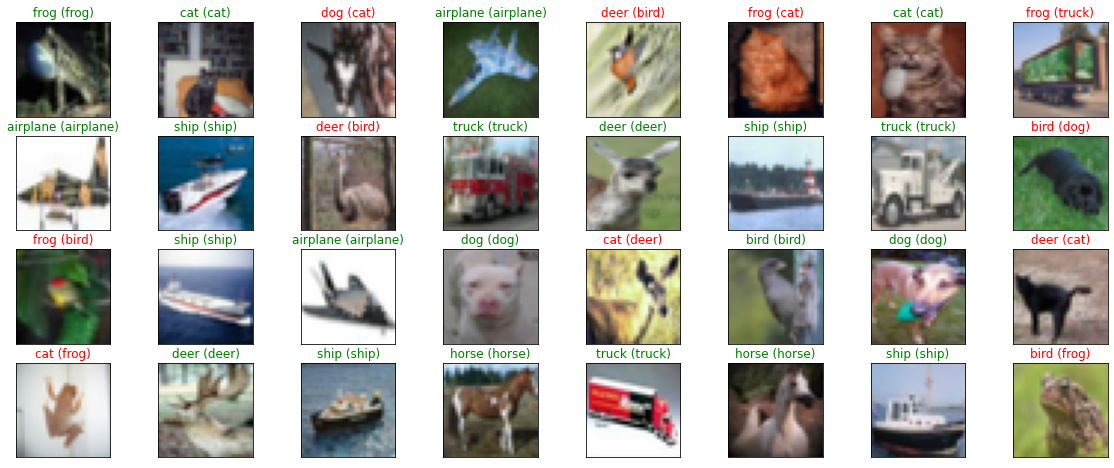

In [13]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))